In [1]:
## Deep Learning 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install keras-tuner

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
!pwd
PATH = '/content/drive/MyDrive/'
PATH_AFTER_MYDRIVE = 'MSC_DATA_SCIENCE/ComputerVision_CW/'
FINAL_PATH = PATH + PATH_AFTER_MYDRIVE
%cd $FINAL_PATH

/content
/content/drive/MyDrive/MSC_DATA_SCIENCE/ComputerVision_CW


In [4]:
test_images  = np.load('generated_data/test_images.npy')
train_images = np.load('generated_data/train_images.npy')
print(np.shape(test_images),'- Test Image Array Shape')
print(np.shape(train_images),'- Train Image Array Shape')

(3068, 100, 100, 3) - Test Image Array Shape
(12271, 100, 100, 3) - Train Image Array Shape


In [5]:
train_labels = pd.read_csv('labels/list_label_train.txt',delimiter = "\s+",names = ['File','Class'])
test_labels = pd.read_csv('labels/list_label_test.txt',delimiter = "\s+",names = ['File','Class'])
num2emo = ['Suprise','Fear','Disgust','Happiness','Sadness','Anger','Neurtral']
print(train_labels['Class'].value_counts())
y_train = train_labels['Class'].to_numpy()
print(test_labels['Class'].value_counts())
y_test = test_labels['Class'].to_numpy()
y_train = y_train-1
y_test  = y_test-1
print(min(y_train),max(y_train),'Training Minmax')
print(min(y_test),max(y_test),'Test Minmax')

4    4772
7    2524
5    1982
1    1290
3     717
6     705
2     281
Name: Class, dtype: int64
4    1185
7     680
5     478
1     329
6     162
3     160
2      74
Name: Class, dtype: int64
0 6 Training Minmax
0 6 Test Minmax


In [9]:
class CNN():

  def __init__(self):
    self.model = self.reset_mod()

  def reset_mod(self):
    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
    model.add(layers.Dropout(0.25))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))


    #Output
    model.add(layers.Dense(7))

    return model


  def compile(self):
      self.model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
      
      return self.model
      
  def details(self):

    print(self.model.summary())



            

In [6]:
train_images_scaled = train_images/255
test_images_scaled  = test_images/255

In [11]:
del train_images
del test_images

In [14]:
del model

In [15]:
net = CNN()
model = net.compile()
net.details()
print()
print()
print('Training:')
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
hist = model.fit(train_images_scaled, y_train,batch_size=128,epochs=150,validation_data=(test_images_scaled,y_test),callbacks=[callback],verbose=1)
#model.save('Trained_CNN',overwrite=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 32)        9248      
_________________________________________________________________
dropout_4 (Dropout)          (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 43, 43, 32)       

In [16]:
model.save('Trained_CNN',overwrite=True)

INFO:tensorflow:Assets written to: Trained_CNN/assets


In [1]:
cnn_model = tf.keras.models.load_model('Trained_CNN')

NameError: ignored

In [11]:
yhat = cnn_model.predict_classes(test_images_scaled)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [15]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [16]:
f1_score(y_test,yhat,average='weighted')

0.7047508948632962

In [17]:
accuracy_score(y_test,yhat)

0.711864406779661

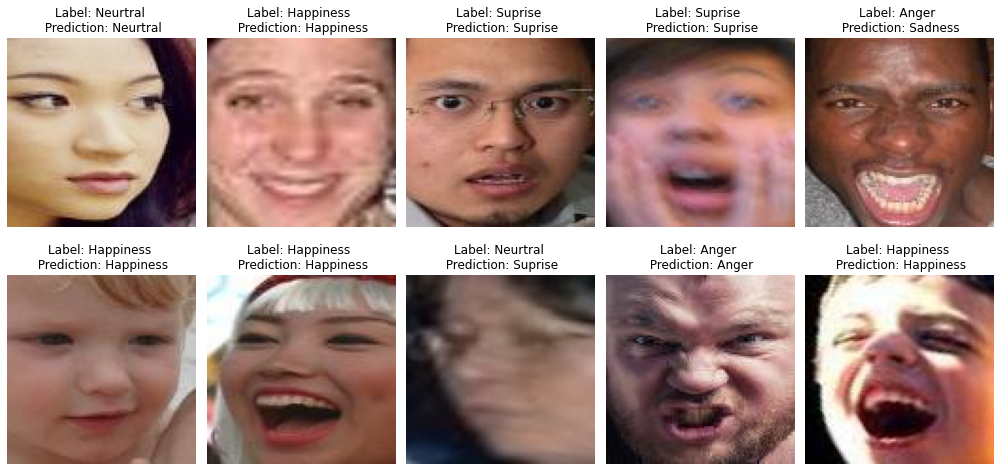

In [19]:
fig, axes = plt.subplots(2, 5, figsize=(14, 7), sharex=True, sharey=True)
ax = axes.ravel()

for ind,i in enumerate(np.random.randint(0,3068,10)):
    ax[ind].imshow(test_images[i])
    ax[ind].set_title(f'Label: {num2emo[y_test[i]]} \n Prediction: {num2emo[yhat[i]]}')
    ax[ind].set_axis_off()
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


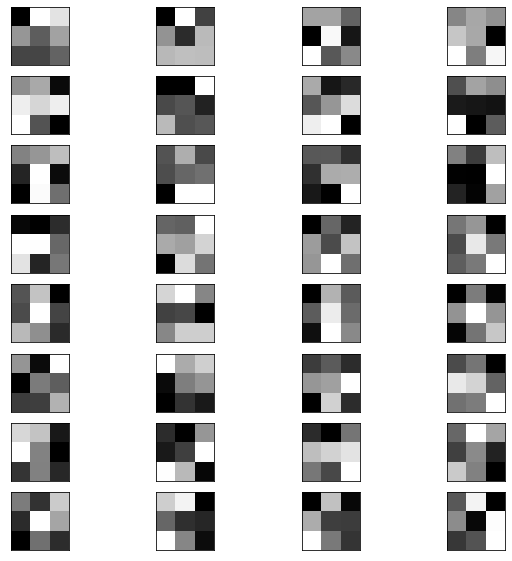

In [47]:
filters, biases = cnn_model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = 32
plt.figure(figsize=(10,10))
for i in range(n_filters):

	f = filters[:, :, :, i]
	for j in range(3):
		ax = plt.subplot(8, 4, i+1)
		ax.set_xticks([])
		ax.set_yticks([])
		
		plt.imshow(f[:, :, j], cmap='gray')
plt.show()

In [12]:
from keras.models import Model

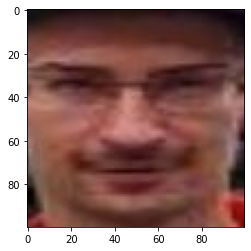

In [38]:
img = test_images[100]
plt.imshow(img)

#For CNN forward pred
img = img.reshape(1,100,100,3)/255

outputs = cnn_model.layers[0].output
model2 = Model(inputs=cnn_model.inputs, outputs=outputs)


In [39]:
feature_maps = model2.predict(img)

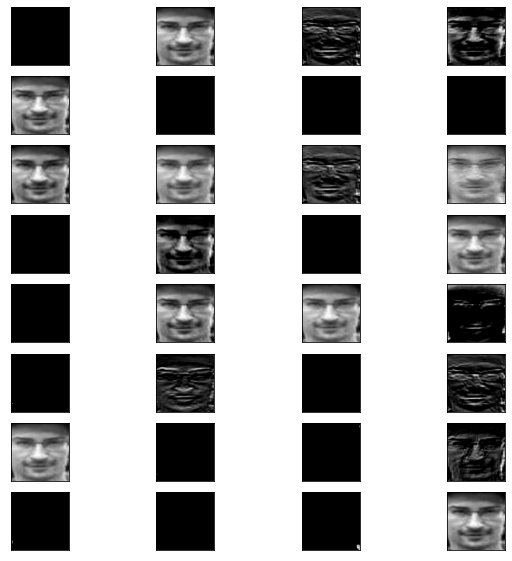

In [40]:
plt.figure(figsize=(10,10))
for i in range(32):
  plt.subplot(8,4,i+1)
  plt.imshow(feature_maps[0][:,:,i],cmap='gray')
  ax = plt.gca()
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
plt.show()

> We have a CNN but now we are going to build a tuneable model... using the code below...

> We need to split out training set into a small subset so to not optimize using the validation set as that could be viewed as validation 'Snooping', so we split our training set 

In [7]:
from sklearn.model_selection import train_test_split
X_train_tune, X_test_tune, y_train_tune, y_test_tune = train_test_split(train_images,y_train, test_size=0.2, random_state=42)

In [8]:
del train_images #Free up some RAM

In [9]:
X_train_tune,X_test_tune = X_train_tune/255,X_test_tune/255

In [10]:
#Using this code: https://github.com/keras-team/keras-tuner/blob/master/examples/cifar10.py
# And docs from https://keras-team.github.io/keras-tuner/examples/helloworld/
import kerastuner as kt


def build_model(hp):
    inputs = tf.keras.Input(shape=(100, 100, 3))
    x = inputs
    for i in range(hp.Int("conv_blocks", 3, 5, default=3)):
        filters = hp.Int("filters_" + str(i), 32, 256, step=32)
        for _ in range(2):
            x = tf.keras.layers.Convolution2D(
                filters, kernel_size=(3, 3), padding="same"
            )(x)
            x = tf.keras.layers.BatchNormalization()(x)
            x = tf.keras.layers.ReLU()(x)
        if hp.Choice("pooling_" + str(i), ["avg", "max"]) == "max":
            x = tf.keras.layers.MaxPool2D()(x)
        else:
            x = tf.keras.layers.AvgPool2D()(x)
    x = tf.keras.layers.GlobalAvgPool2D()(x)
    x = tf.keras.layers.Dense(
        hp.Int("hidden_size1", 30, 100, step=10, default=50), activation="relu"
    )(x)

    x = tf.keras.layers.Dense(
        hp.Int("hidden_size2", 30, 100, step=10, default=50), activation="relu"
    )(x)
    x = tf.keras.layers.Dense(
        hp.Int("hidden_size3", 30, 100, step=10, default=50), activation="relu"
    )(x)



    outputs = tf.keras.layers.Dense(7)(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")
        ),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model



In [11]:
#https://github.com/keras-team/keras-tuner/issues/122
class MyTuner(kt.tuners.BayesianOptimization):
  def run_trial(self, trial, *args, **kwargs):
    # You can add additional HyperParameters for preprocessing and custom training loops
    # via overriding `run_trial`
    kwargs['batch_size'] = 128 #trial.hyperparameters.Int('batch_size', 32, 256, step=32)

    super(MyTuner, self).run_trial(trial, *args, **kwargs)



tuner = MyTuner(build_model, objective="val_accuracy",max_trials=20,overwrite=True)

In [12]:
tuner.search(
    X_train_tune,y_train_tune,
    validation_data=(X_test_tune,y_test_tune),
    epochs=25,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)],
)

best_model = tuner.get_best_models(1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

Trial 20 Complete [00h 03m 04s]
val_accuracy: 0.021181263029575348

Best val_accuracy So Far: 0.4004073441028595
Total elapsed time: 00h 39m 48s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model.summary()

In [14]:
print(type(best_hyperparameters))

['Boolean', 'Choice', 'Fixed', 'Float', 'Int', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_conditions', '_conditions_are_active', '_exists', '_get_name', '_hps', '_maybe_conditional_scope', '_name_scopes', '_register', '_retrieve', '_space', '_validate_name', 'conditional_scope', 'copy', 'from_config', 'from_proto', 'get', 'get_config', 'is_active', 'merge', 'name_scope', 'space', 'to_proto', 'values']
